In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src')
from CellType_PSY import *
from scipy.stats import combine_pvalues
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()

os.chdir("/home/jw3514/Work/CellType_Psy/notebooks3/")
print(f"Current working directory: {os.getcwd()}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working directory: /home/jw3514/Work/CellType_Psy/notebooks3


In [10]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
fm.fontManager.addfont(font_path)  # Only if you're adding a new font file
fm._load_fontmanager(try_read_cache=False)

In [11]:
ASD_GW_top60 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.ASD.top60.txt")
ASD_GW_top200 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.ASD.top200.txt")
ASD_GW_top500 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.ASD.top500.txt")
ASD_GW_top1000 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.ASD.top1000.txt")

SCZ_GW_top60 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.SCZ.top60.txt")
SCZ_GW_top200 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.SCZ.top200.txt")
SCZ_GW_top500 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.SCZ.top500.txt")
SCZ_GW_top1000 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.SCZ.top1000.txt")

In [12]:
X22q_GW = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.22q.11.46.txt")
BP_GW_top500 = Fil2Dict("../../UNIMED/dat/Genetics/GeneWeights/Rare/GW.BP.top500.txt")

In [13]:
# Devolep Profile


In [14]:
ExpMat = pd.read_csv("/home/jw3514/Work/BrainDisorders/data/expression/brainspan/gene_matrix/gene_exp_avg2time.csv", index_col=0)

In [15]:
LogExpMat = np.log2(ExpMat+1)

In [16]:
qnLogExpMat = quantileNormalize(LogExpMat)

In [17]:
Meta = pd.read_csv("/home/jw3514/Work/BrainDisorders/data/expression/brainspan/gene_matrix/rows_metadata.csv", index_col=0)
Meta = Meta[~Meta["entrez_id"].isna()]
Meta["entrez_id"] = [int(x) for x in Meta["entrez_id"].values]

In [18]:
Time = ['mean_2A', 'mean_2B', 'mean_3A', 'mean_3B', 'mean_4', 'mean_5',
       'mean_6', 'mean_7', 'mean_8', 'mean_9', 'mean_10', 'mean_11']

In [19]:
ASD_Genes = list(ASD_GW_top500.keys())[:60]
SCZ_Genes = list(SCZ_GW_top500.keys())[:60]
BP_Genes = list(BP_GW_top500.keys())[:60]
#DDD_Genes = 
X22q_Genes = list(X22q_GW.keys())

In [20]:
ASD_Idx = Meta[Meta["entrez_id"].isin(ASD_Genes)].index
ASD_Dat = qnLogExpMat.loc[ASD_Idx, Time]

SCZ_Idx = Meta[Meta["entrez_id"].isin(SCZ_Genes)].index
SCZ_Dat = qnLogExpMat.loc[SCZ_Idx, Time]

BP_Idx = Meta[Meta["entrez_id"].isin(BP_Genes)].index
BP_Dat = qnLogExpMat.loc[BP_Idx, Time]

#DDD_Idx = Meta[Meta["entrez_id"].isin(DDD_Genes)].index
#DDD_Dat = qnLogExpMat.loc[DDD_Idx, Time]

X22q_Idx = Meta[Meta["entrez_id"].isin(X22q_Genes)].index
X22q_Dat = qnLogExpMat.loc[X22q_Idx, Time]

ALL_Dat = qnLogExpMat.loc[:, Time]

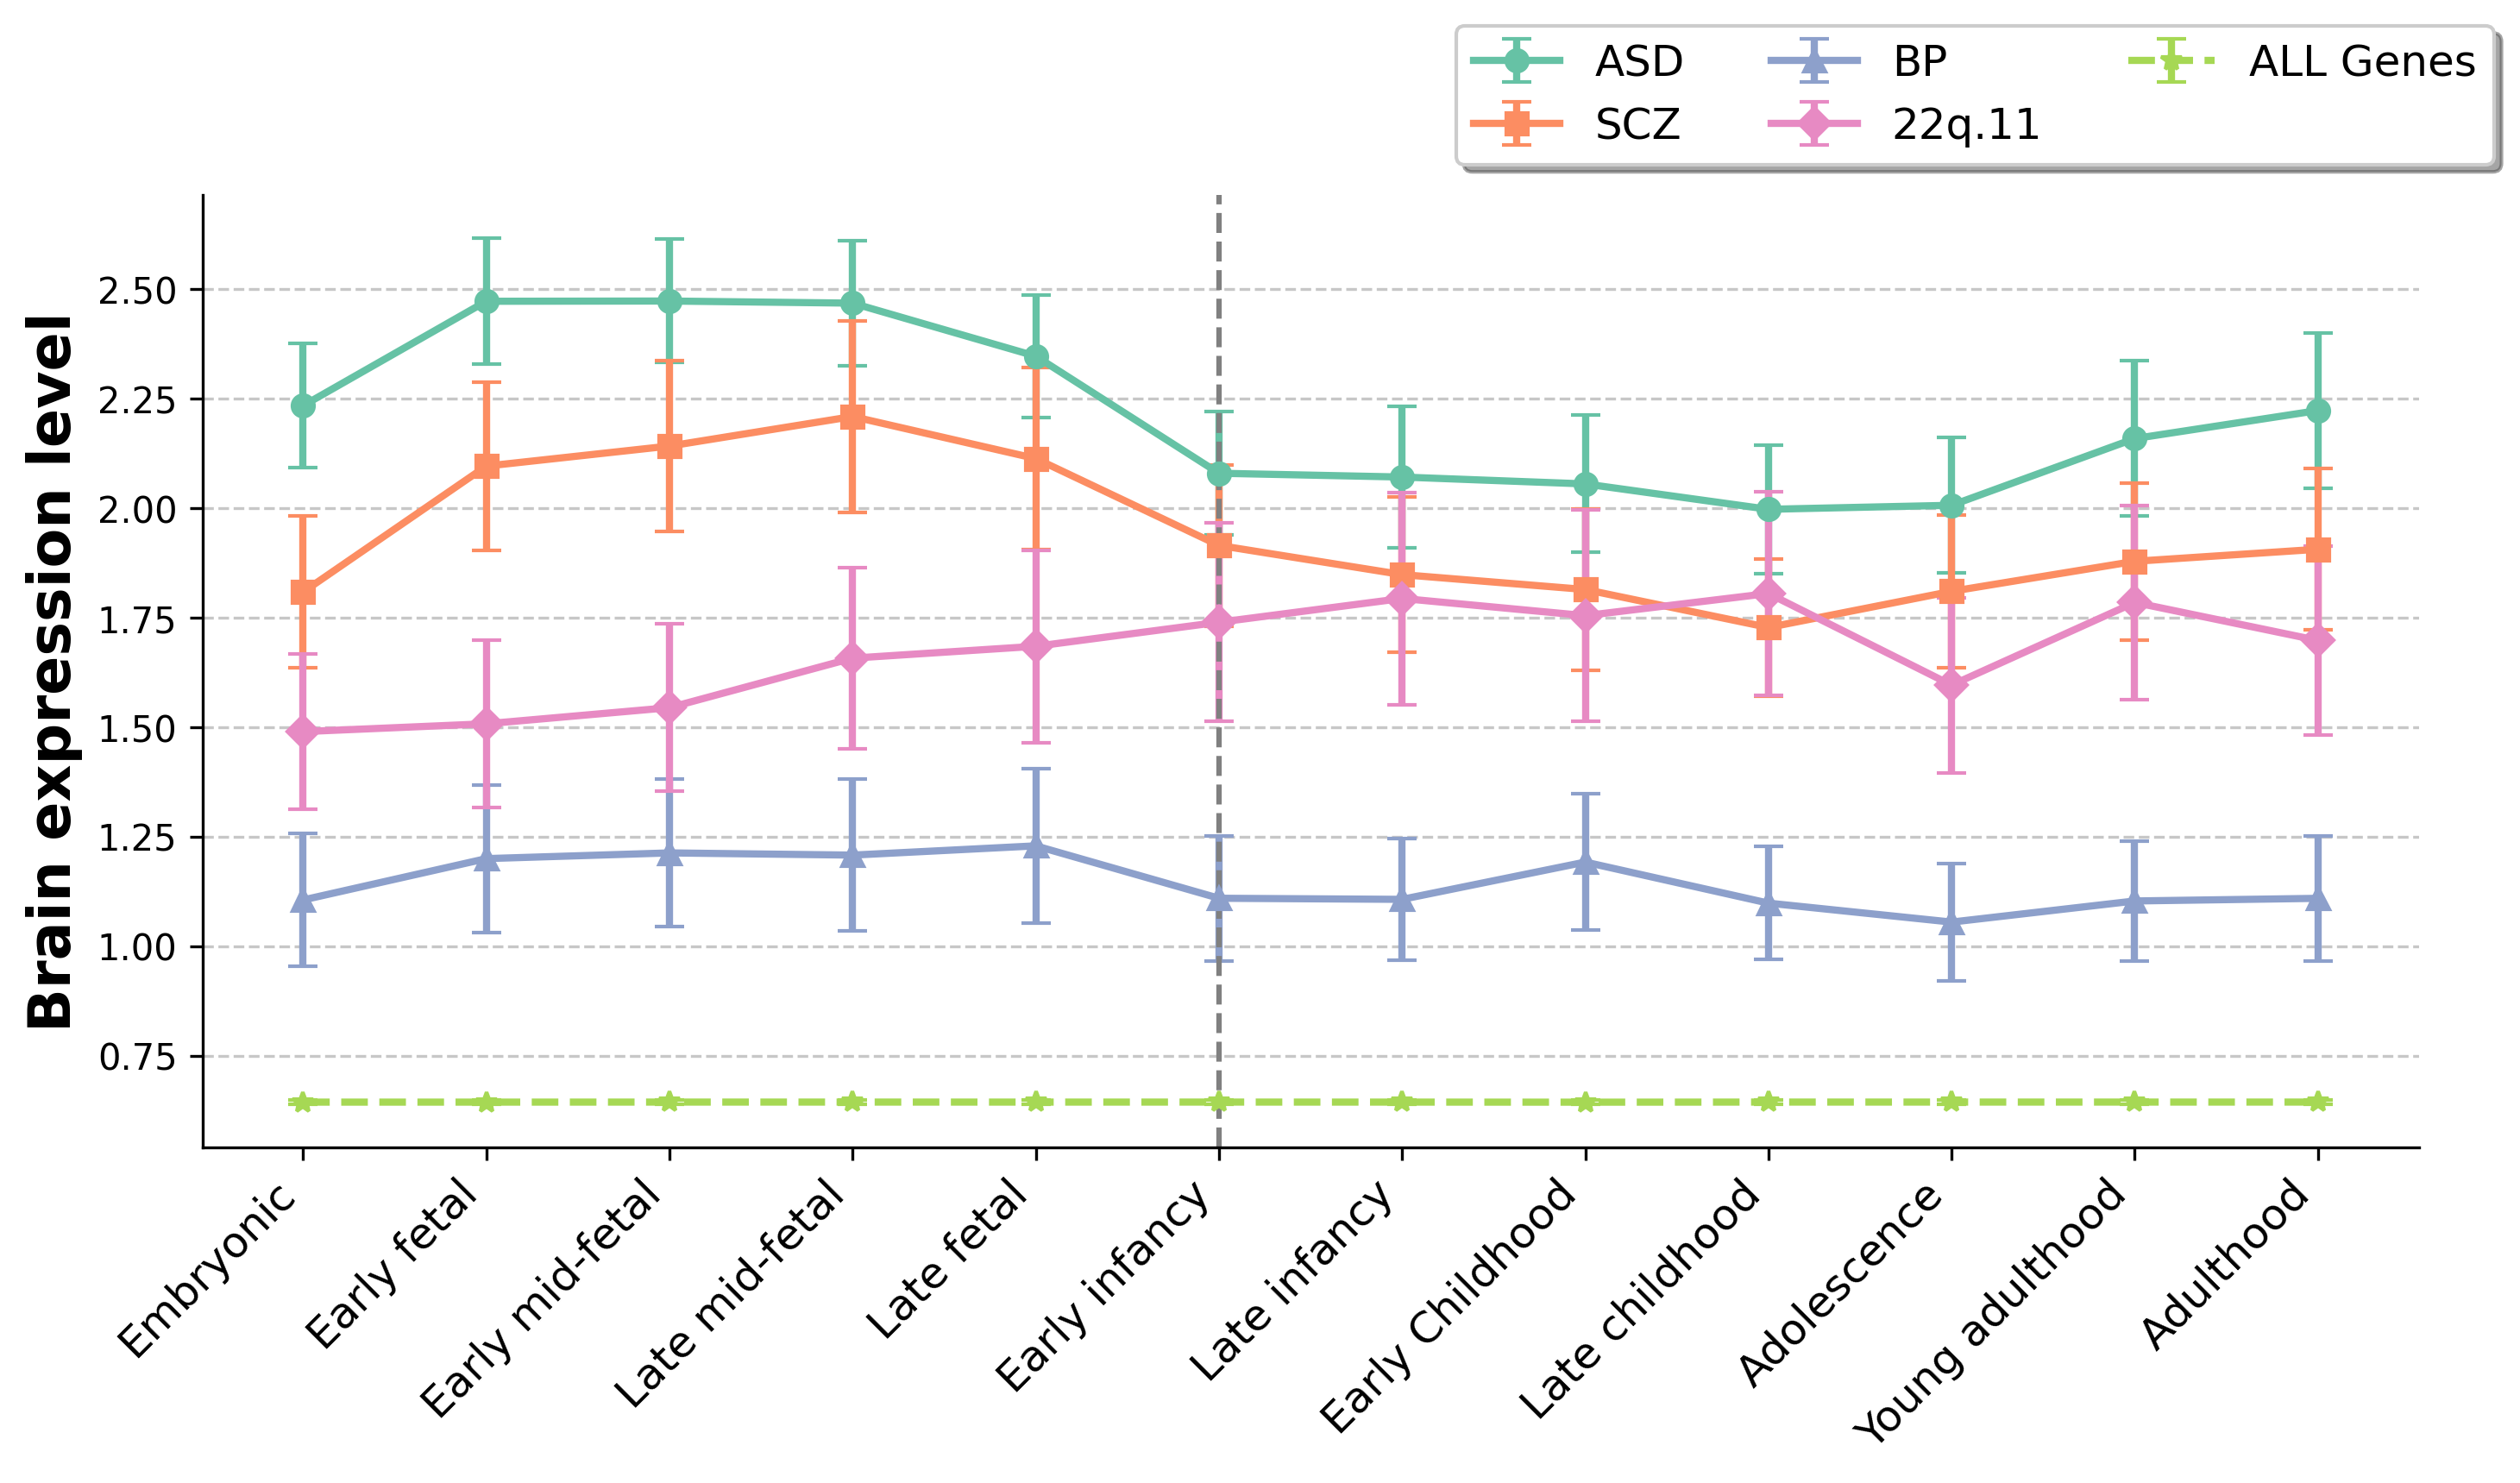

In [21]:
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Create a color palette
palette = sns.color_palette("Set2", 5)

# Create the figure and axis
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

# Plotting the data with error bars
ax.errorbar(x=ASD_Dat.columns.values,
            y=ASD_Dat.mean(axis=0), 
            yerr=ASD_Dat.std(axis=0)/math.sqrt(ASD_Dat.shape[0]), 
            label="ASD", color=palette[0], marker='o', capsize=4, linewidth=2)

ax.errorbar(x=SCZ_Dat.columns.values,
            y=SCZ_Dat.mean(axis=0), 
            yerr=SCZ_Dat.std(axis=0)/math.sqrt(SCZ_Dat.shape[0]), 
            label="SCZ", color=palette[1], marker='s', capsize=4, linewidth=2)

ax.errorbar(x=BP_Dat.columns.values,
            y=BP_Dat.mean(axis=0), 
            yerr=BP_Dat.std(axis=0)/math.sqrt(BP_Dat.shape[0]), 
            label="BP", color=palette[2], marker='^', capsize=4, linewidth=2)

ax.errorbar(x=X22q_Dat.columns.values,
            y=X22q_Dat.mean(axis=0), 
            yerr=X22q_Dat.std(axis=0)/math.sqrt(X22q_Dat.shape[0]), 
            label="22q.11", color=palette[3], marker='D', capsize=4, linewidth=2)

ax.errorbar(x=ALL_Dat.columns.values,
            y=ALL_Dat.mean(axis=0), 
            yerr=ALL_Dat.std(axis=0)/math.sqrt(ALL_Dat.shape[0]), 
            label="ALL Genes", color=palette[4], ls="--", marker='*', capsize=4, linewidth=2)

# Vertical line at x = 5
ax.axvline(x=5, color='grey', ls="--", linewidth=1.5)

# Customizing x-axis ticks
labels = ["Embryonic", "Early fetal", "Early mid-fetal", "Late mid-fetal", "Late fetal", 
          "Early infancy", "Late infancy", "Early Childhood", "Late childhood", "Adolescence",
          "Young adulthood", "Adulthood"]
ax.set_xticks(ASD_Dat.columns.values)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)

# Set y-axis label
ax.set_ylabel("Brain expression level", fontsize=16, weight='bold')

# Set y-axis limits
#ax.set_ylim(0.5, 4.5)

# Remove top and right spines
ax.spines[['right', 'top']].set_visible(False)

# Add grid lines
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
ax.legend(loc="upper center", bbox_to_anchor=(0.8, 1.2), fancybox=True, shadow=True, ncol=3, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
#HIQ_ASD_Genes = pd.read_csv("../../UNIMED/dat/Genetics/GeneWeights/Rare/HIQ.top500.gw", header=None)
#HIQ_ASD_Genes = HIQ_ASD_Genes[0].values[:60]
#LIQ_ASD_Genes = pd.read_csv("../../UNIMED/dat/Genetics/GeneWeights/Rare/LIQ.top500.gw", header=None)
#LIQ_ASD_Genes = LIQ_ASD_Genes[0].values[:60]

In [23]:
HIQ_ASD_Genes = pd.read_csv("../../ASD_Circuits/dat/Unionize_bias/ASD.HIQ.gw.csv", header=None)
HIQ_ASD_Genes = HIQ_ASD_Genes[0].values
LIQ_ASD_Genes = pd.read_csv("../../ASD_Circuits/dat/Unionize_bias/ASD.LIQ.gw.csv", header=None)
LIQ_ASD_Genes = LIQ_ASD_Genes[0].values

In [24]:
HIQASD_Idx = Meta[Meta["entrez_id"].isin(HIQ_ASD_Genes)].index
HIQASD_Dat = qnLogExpMat.loc[HIQASD_Idx, Time]

LIQASD_Idx = Meta[Meta["entrez_id"].isin(LIQ_ASD_Genes)].index
LIQASD_Dat = qnLogExpMat.loc[LIQASD_Idx, Time]

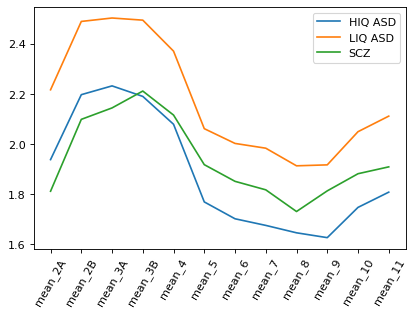

In [25]:
plt.plot(HIQASD_Dat.mean(axis=0), label="HIQ ASD")
plt.plot(LIQASD_Dat.mean(axis=0), label="LIQ ASD")
plt.plot(SCZ_Dat.mean(axis=0), label="SCZ")
plt.xticks(rotation=60)
plt.legend()
plt.show()

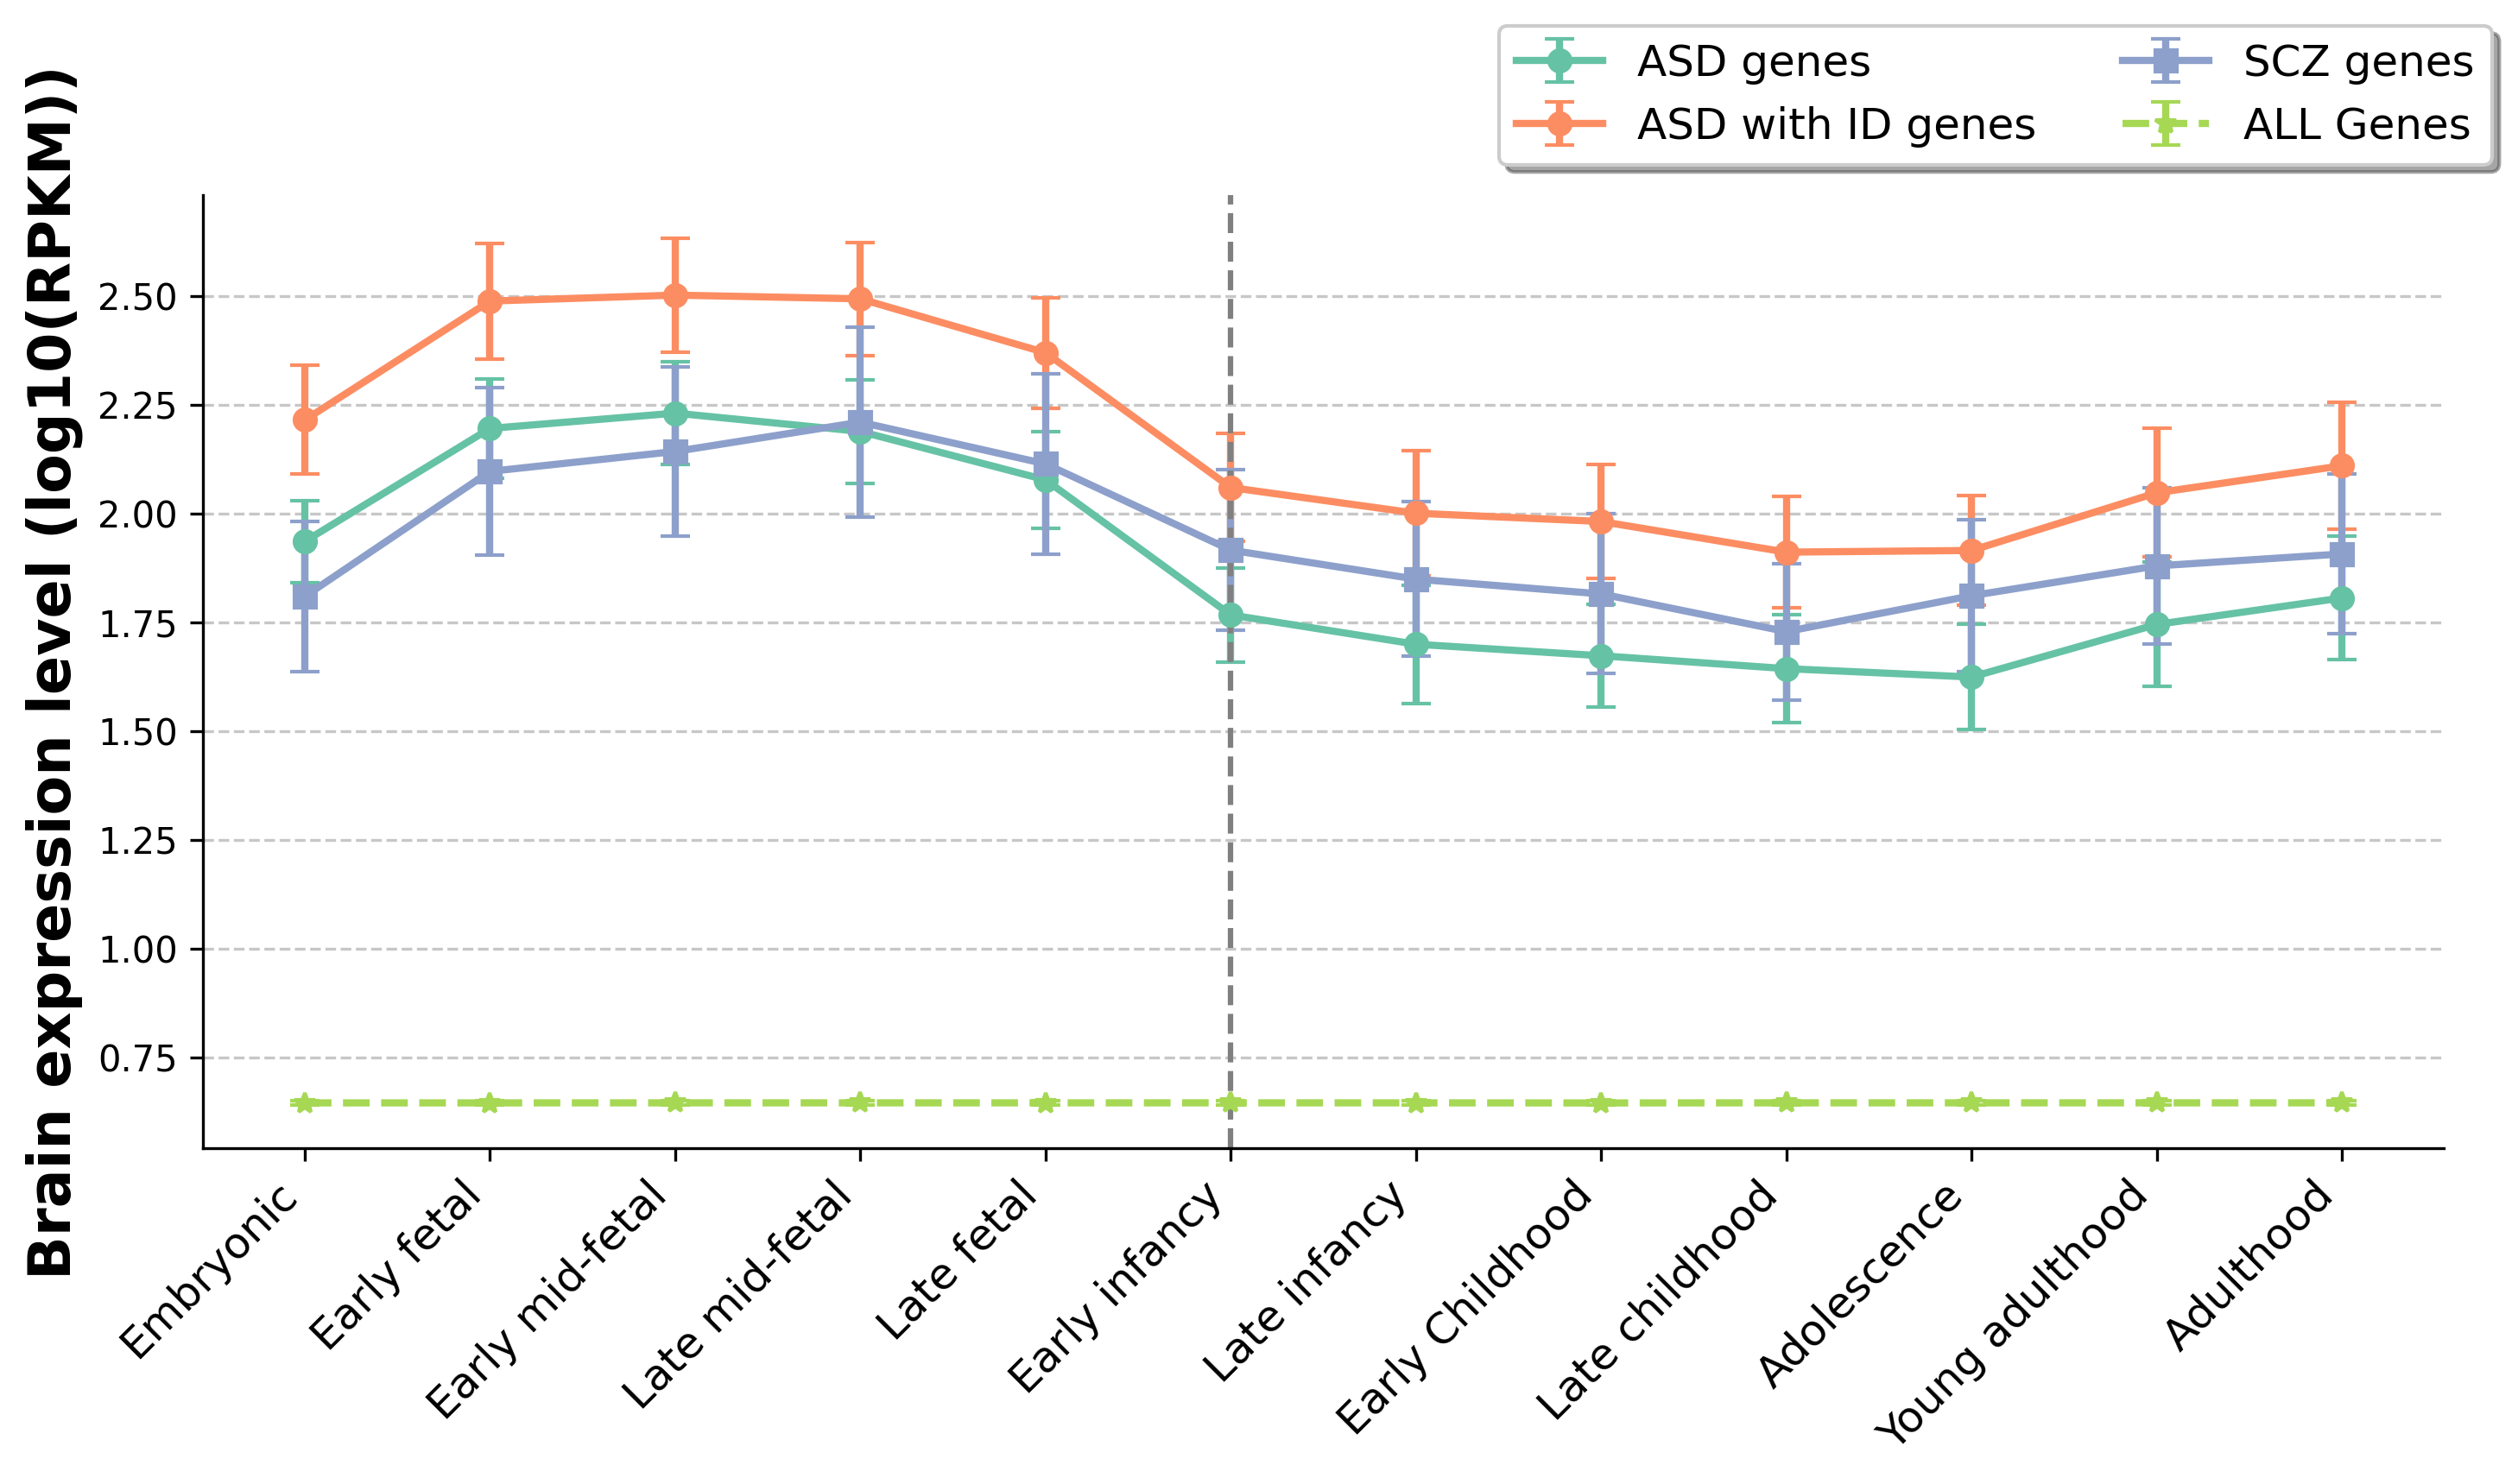

In [27]:
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Create a color palette
palette = sns.color_palette("Set2", 5)

# Create the figure and axis
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

# Plotting the data with error bars
ax.errorbar(x=HIQASD_Dat.columns.values,
            y=HIQASD_Dat.mean(axis=0), 
            yerr=HIQASD_Dat.std(axis=0)/math.sqrt(ASD_Dat.shape[0]), 
            label="ASD genes", color=palette[0], marker='o', capsize=4, linewidth=2)

ax.errorbar(x=LIQASD_Dat.columns.values,
            y=LIQASD_Dat.mean(axis=0), 
            yerr=LIQASD_Dat.std(axis=0)/math.sqrt(ASD_Dat.shape[0]), 
            label="ASD with ID genes", color=palette[1], marker='o', capsize=4, linewidth=2)

ax.errorbar(x=SCZ_Dat.columns.values,
            y=SCZ_Dat.mean(axis=0), 
            yerr=SCZ_Dat.std(axis=0)/math.sqrt(SCZ_Dat.shape[0]), 
            label="SCZ genes", color=palette[2], marker='s', capsize=4, linewidth=2)

# ax.errorbar(x=X22q_Dat.columns.values,
#             y=X22q_Dat.mean(axis=0), 
#             yerr=X22q_Dat.std(axis=0)/math.sqrt(X22q_Dat.shape[0]), 
#             label="22q.11 genes", color=palette[3], marker='D', capsize=4, linewidth=2)

ax.errorbar(x=ALL_Dat.columns.values,
            y=ALL_Dat.mean(axis=0), 
            yerr=ALL_Dat.std(axis=0)/math.sqrt(ALL_Dat.shape[0]), 
            label="ALL Genes", color=palette[4], ls="--", marker='*', capsize=4, linewidth=2)

# Vertical line at x = 5
ax.axvline(x=5, color='grey', ls="--", linewidth=1.5)

# Customizing x-axis ticks
labels = ["Embryonic", "Early fetal", "Early mid-fetal", "Late mid-fetal", "Late fetal", 
          "Early infancy", "Late infancy", "Early Childhood", "Late childhood", "Adolescence",
          "Young adulthood", "Adulthood"]
ax.set_xticks(ASD_Dat.columns.values)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)

# Set y-axis label
ax.set_ylabel("Brain expression level (log10(RPKM))", fontsize=16, weight='bold')

# Set y-axis limits
#ax.set_ylim(0.5, 4.5)

# Remove top and right spines
ax.spines[['right', 'top']].set_visible(False)

# Add grid lines
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
ax.legend(loc="upper center", bbox_to_anchor=(0.8, 1.2), fancybox=True, shadow=True, ncol=2, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()